Regression is a type of supervised machine learning technique used for predicting a continuous target variable based on one or more input features. The goal of regression is to find a mathematical relationship (model) that maps the input features to the target variable. There are several regression algorithms you can use, depending on the nature of your data and the problem you are trying to solve. Here's an overview of some common regression techniques:

1. **Linear Regression**:
   - Simple linear regression models the relationship between a single input feature and the target variable as a straight line.
   - Multiple linear regression extends this to multiple input features.
   - The model assumes a linear relationship between the features and the target.
2. **Support Vector Regression (SVR)**:
  - SVR is a regression technique based on support vector machines.
   - It seeks to find a hyperplane that best fits the data, allowing a margin of error.
3. K-Nearest Neighbors (KNN)
   can be used for regression tasks as well as classification. When applied to   regression, it's often referred to as "K-Nearest Neighbors Regression" or "KNN Regression." Instead of predicting a class label, KNN regression predicts a continuous target variabl

4. **Polynomial Regression**:
   - Polynomial regression extends linear regression by fitting a polynomial equation to the data, allowing it to capture more complex relationships.
   - It can model curved relationships, which a simple linear regression cannot.

5. **Decision Tree Regression**:
   - Decision tree regression uses decision trees to partition the data into regions and predict the target variable based on the average of data points in each region.

In [2]:
#import library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Data To Dataframe
df=pd.read_csv("CarPrice_Assignment.csv")

# Exploratory data analysis Python

In [4]:
# Shallow copy
df_copy=df.copy

In [5]:
# The shape of a DataFrame.
df.shape

(205, 26)

In [6]:
# column labels of the Dataframe
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [7]:
# Returns a specified number of rows, string from the top.
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [8]:
# Return the last 5 rows
df.tail()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0
204,205,-1,volvo 264gl,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625.0


In [9]:
# specific rows of a DataFrame ( "integer location" Method)
df.iloc[100:200]

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
100,101,0,nissan nv200,gas,std,four,sedan,fwd,front,97.2,...,120,2bbl,3.33,3.47,8.5,97,5200,27,34,9549.0
101,102,0,nissan dayz,gas,std,four,sedan,fwd,front,100.4,...,181,mpfi,3.43,3.27,9.0,152,5200,17,22,13499.0
102,103,0,nissan fuga,gas,std,four,wagon,fwd,front,100.4,...,181,mpfi,3.43,3.27,9.0,152,5200,17,22,14399.0
103,104,0,nissan otti,gas,std,four,sedan,fwd,front,100.4,...,181,mpfi,3.43,3.27,9.0,152,5200,19,25,13499.0
104,105,3,nissan teana,gas,std,two,hatchback,rwd,front,91.3,...,181,mpfi,3.43,3.27,9.0,160,5200,19,25,17199.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,196,-1,volvo 144ea,gas,std,four,wagon,rwd,front,104.3,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,13415.0
196,197,-2,volvo 244dl,gas,std,four,sedan,rwd,front,104.3,...,141,mpfi,3.78,3.15,9.5,114,5400,24,28,15985.0
197,198,-1,volvo 245,gas,std,four,wagon,rwd,front,104.3,...,141,mpfi,3.78,3.15,9.5,114,5400,24,28,16515.0
198,199,-2,volvo 264gl,gas,turbo,four,sedan,rwd,front,104.3,...,130,mpfi,3.62,3.15,7.5,162,5100,17,22,18420.0


In [10]:
# describe() method gives us summary statistics for numerical columns in  DataFrame.
df.describe().T

,count,mean,std,min,25%,50%,75%,max
car_ID,205.0,103.000000,59.322565,1.00,52.00,103.00,154.00,205.00
symboling,205.0,0.834146,1.245307,-2.00,0.00,1.00,2.00,3.00
wheelbase,205.0,98.756585,6.021776,86.60,94.50,97.00,102.40,120.90
carlength,205.0,174.049268,12.337289,141.10,166.30,173.20,183.10,208.10
carwidth,205.0,65.907805,2.145204,60.30,64.10,65.50,66.90,72.30
carheight,205.0,53.724878,2.443522,47.80,52.00,54.10,55.50,59.80
curbweight,205.0,2555.565854,520.680204,1488.00,2145.00,2414.00,2935.00,4066.00
enginesize,205.0,126.907317,41.642693,61.00,97.00,120.00,141.00,326.00
boreratio,205.0,3.329756,0.270844,2.54,3.15,3.31,3.58,3.94
stroke,205.0,3.255415,0.313597,2.07,3.11,3.29,3.41,4.17


In [11]:
# prints information about the DataFrame. [number of columns, column labels, column data types, memory usage, range index,]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [12]:
# Including only string columns in a DataFrame description
df.describe(include=object)

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
count,205,205,205,205,205,205,205,205,205,205
unique,147,2,2,2,5,3,2,7,7,8
top,toyota corona,gas,std,four,sedan,fwd,front,ohc,four,mpfi
freq,6,185,168,115,96,120,202,148,159,94


<Axes: xlabel='fueltype', ylabel='count'>

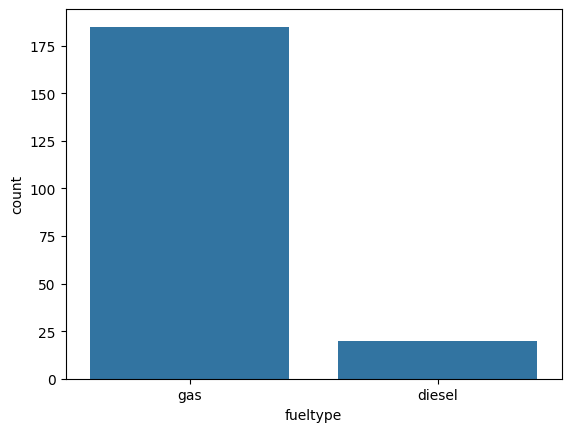

In [13]:
sns.countplot(data=df,x='fueltype')

#DATA CLEANING

In [14]:
# To check for duplicate values in a  DataFrame
df.duplicated().sum()

0

In [15]:
# Missing values in the dataset.
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [16]:
# index row columns remove
df=df.drop(["car_ID"],axis=1)

In [17]:
df.dtypes

symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

In [18]:
df['CarName'].unique()

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

In [19]:
df.insert(1, 'Company', df['CarName'].str.split(' ').str[0])
#df.insert(1,'company',df['CarName'].str.split('').str[0])  #error

In [20]:
df.drop(columns=['CarName'],inplace=True)

In [21]:
df

,symboling,Company,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,-1,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,-1,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,-1,volvo,diesel,turbo,four,sedan,rwd,front,109.1,188.8,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [22]:
df['Company'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

<Axes: >

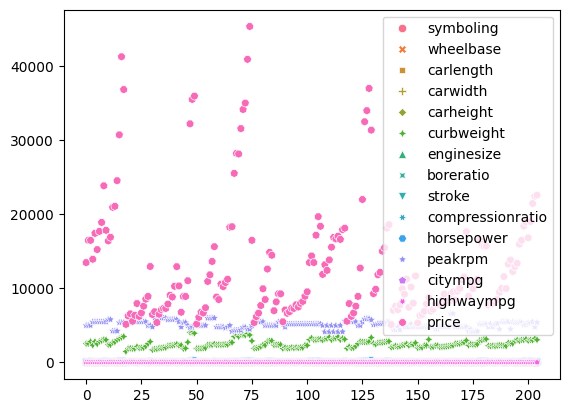

In [23]:
sns.scatterplot(df)

<Axes: xlabel='Company', ylabel='price'>

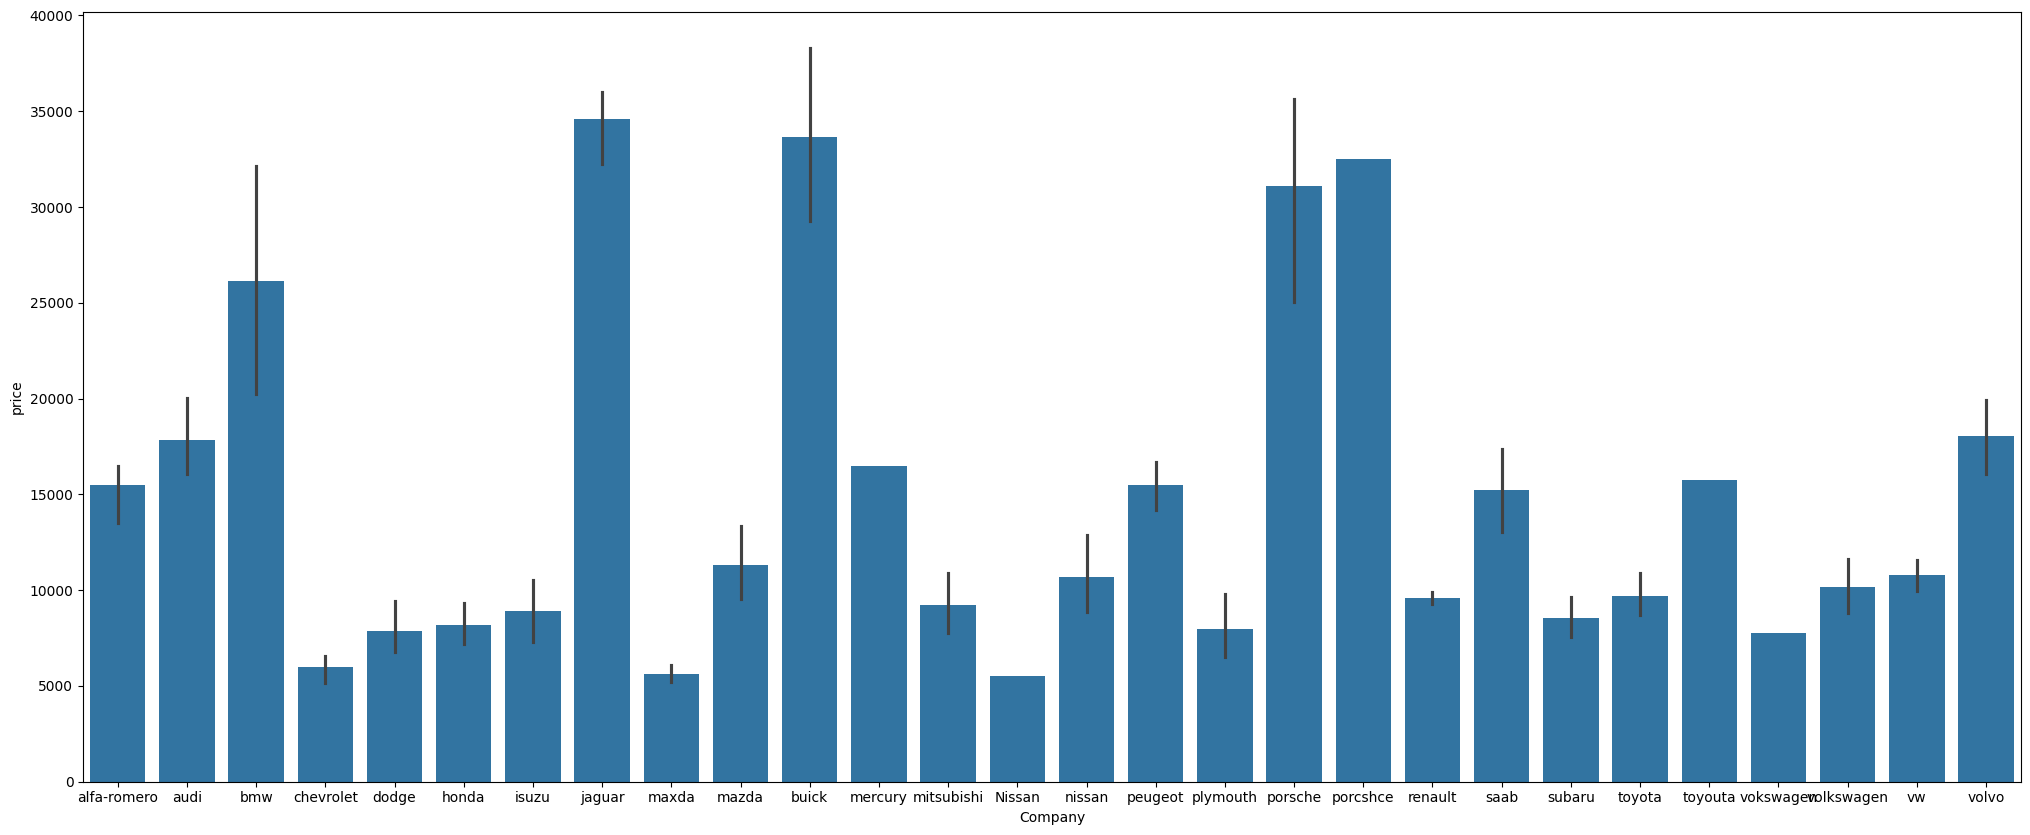

In [24]:
plt.subplots(figsize=(25,10))
sns.barplot(data=df,x='Company',y='price')

In [25]:
# To select strings you must use the object dtype, but note that this will return all object dtype columns
df.select_dtypes(include=object).columns.to_list()
#df.select_dtypes(include=object).columns.tolist()


['Company',
 'fueltype',
 'aspiration',
 'doornumber',
 'carbody',
 'drivewheel',
 'enginelocation',
 'enginetype',
 'cylindernumber',
 'fuelsystem']

In [26]:
# unues columns
df.drop(columns=['symboling','wheelbase'],inplace=True)

In [27]:
# Numerical columns list
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_columns.remove('price')

In [28]:
# Label encoding

In [29]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
df['Company']=lb.fit_transform(df['Company'])
df['fueltype']=lb.fit_transform(df['fueltype'])
df['aspiration']=lb.fit_transform(df['aspiration'])
df['doornumber']=lb.fit_transform(df['doornumber'])
df['carbody']=lb.fit_transform(df['carbody'])
df['drivewheel']=lb.fit_transform(df['drivewheel'])
df['enginelocation']=lb.fit_transform(df['enginelocation'])
df['enginetype']=lb.fit_transform(df['enginetype'])
df['cylindernumber']=lb.fit_transform(df['cylindernumber'])
df['fuelsystem']=lb.fit_transform(df['fuelsystem'])

In [30]:
numerical_columns

['carlength',
 'carwidth',
 'carheight',
 'curbweight',
 'enginesize',
 'boreratio',
 'stroke',
 'compressionratio',
 'horsepower',
 'peakrpm',
 'citympg',
 'highwaympg']

In [31]:
from sklearn.preprocessing import StandardScaler
ssr=StandardScaler()
df[numerical_columns]=ssr.fit_transform(df[numerical_columns])

In [32]:
df

,Company,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,carlength,carwidth,carheight,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,1,0,1,0,2,0,-0.426521,-0.844782,-2.020417,...,0.074449,5,0.519071,-1.839377,-0.288349,0.174483,-0.262960,-0.646553,-0.546059,13495.0
1,1,1,0,1,0,2,0,-0.426521,-0.844782,-2.020417,...,0.074449,5,0.519071,-1.839377,-0.288349,0.174483,-0.262960,-0.646553,-0.546059,16500.0
2,1,1,0,1,2,2,0,-0.231513,-0.190566,-0.543527,...,0.604046,5,-2.404880,0.685946,-0.288349,1.264536,-0.262960,-0.953012,-0.691627,16500.0
3,2,1,0,0,3,1,0,0.207256,0.136542,0.235942,...,-0.431076,5,-0.517266,0.462183,-0.035973,-0.053668,0.787855,-0.186865,-0.109354,13950.0
4,2,1,0,0,3,0,0,0.207256,0.230001,0.235942,...,0.218885,5,-0.517266,0.462183,-0.540725,0.275883,0.787855,-1.106241,-1.273900,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,26,1,0,0,3,2,0,1.198549,1.398245,0.728239,...,0.339248,5,1.666445,-0.336970,-0.162161,0.250533,0.577692,-0.340094,-0.400490,16845.0
201,26,1,1,0,3,2,0,1.198549,1.351515,0.728239,...,0.339248,5,1.666445,-0.336970,-0.364062,1.416637,0.367529,-0.953012,-0.837195,19045.0
202,26,1,0,0,3,2,0,1.198549,1.398245,0.728239,...,1.109571,5,0.926204,-1.232021,-0.338824,0.757535,0.787855,-1.106241,-1.128332,21485.0
203,26,0,1,0,3,2,0,1.198549,1.398245,0.728239,...,0.435538,3,-1.183483,0.462183,3.244916,0.047732,-0.683286,0.119594,-0.546059,22470.0


In [33]:
# x and y split

In [34]:
x=df.iloc[ : , :-1]
y=df.iloc[ : , -1]

In [35]:
# Train and Test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=11)

# LinearRegression

In [36]:
# LinearRegression
from sklearn.linear_model import LinearRegression

# Create a Linear Regression model
lr=LinearRegression()

# Train the model on the training data
lr.fit(x_train,y_train)

# Make predictions on the test data
y_pred_lr=lr.predict(x_test)

# Evaluate the model's performance
from sklearn.metrics import mean_absolute_error,mean_squared_error
print('MAE:',mean_absolute_error(y_test,y_pred_lr))
mse_lr=mean_squared_error(y_test,y_pred_lr)
print('MSE:',mse_lr)

MAE: 2142.9703979715828
MSE: 9351120.379315864


Text(0.5, 1.0, 'EVALUATE')

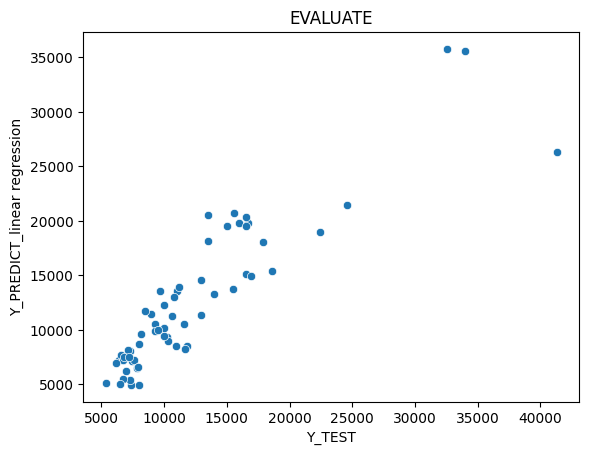

In [37]:
# Create a scatter plot
sns.scatterplot(x=y_test,y=y_pred_lr)

# Add labels and a title
plt.xlabel('Y_TEST')
plt.ylabel('Y_PREDICT_linear regression')
plt.title('EVALUATE')

# Support Vector Machine (SVM)

In [38]:
#svm
from sklearn.svm import SVR

# Create a svm model
svr=SVR()

# Train the model on the training data
svr.fit(x_train,y_train)

# Make predictions on the test data
y_pred_svm=svr.predict(x_test)

#  Evaluate the model
from sklearn.metrics import mean_absolute_error,mean_squared_error
print('MAE:',mean_absolute_error(y_test,y_pred_svm))
mse_svm=mean_squared_error(y_test,y_pred_svm)
print("mse",mse_svm)

MAE: 4427.266337086366
mse 48774553.675131686


Text(0.5, 1.0, 'EVALUATE')

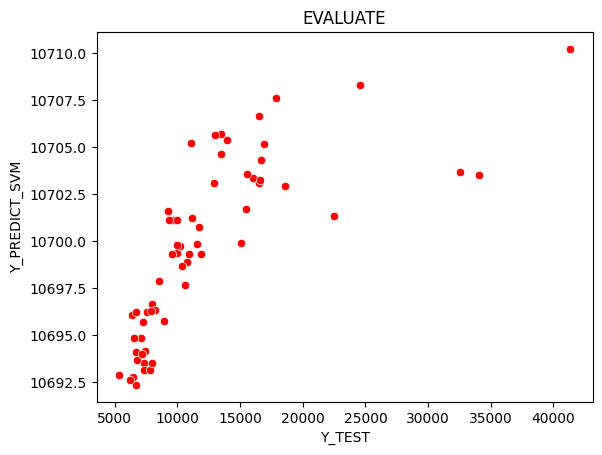

In [39]:
# Create a scatter plot
sns.scatterplot(x=y_test,y=y_pred_svm,color = "red")

# Add labels and a title
plt.xlabel('Y_TEST')
plt.ylabel('Y_PREDICT_SVM')
plt.title('EVALUATE')

# KNeighborsRegressor

In [40]:
# KNeighborsRegressor
from sklearn.neighbors import KNeighborsRegressor

## Create KNN model
k=3
knn=KNeighborsRegressor(n_neighbors=k)

# Train the model on the training data
knn.fit(x_train,y_train)

# Make predictions on the test data
y_pred_knn=knn.predict(x_test)

# Evaluate the model's performance
from sklearn.metrics import mean_absolute_error,mean_squared_error
print('MAE:',mean_absolute_error(y_test,y_pred_knn))
mse_knn=mean_squared_error(y_test,y_pred_knn)
print("MSE",mse_knn)

MAE: 1955.4408548387094
MSE 9697257.796603944


Text(0.5, 1.0, 'EVALUATE')

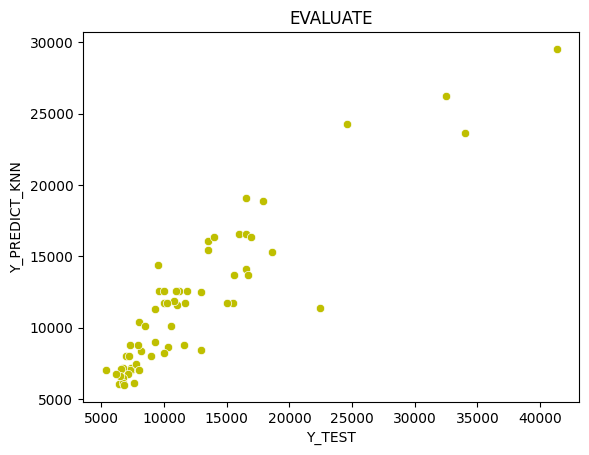

In [41]:
# Create a scatter plot
sns.scatterplot(x=y_test,y=y_pred_knn,color = "y")

# Add labels and a title
plt.xlabel('Y_TEST')
plt.ylabel('Y_PREDICT_KNN')
plt.title('EVALUATE')

In [42]:
#Choosing ‘k’ by elbow method

In [43]:
knn_mse=[]
for i in range(1,60):
  knn_i=KNeighborsRegressor(n_neighbors=i)
  # train data
  knn_i.fit(x_train,y_train)
  # predict
  y_pred_knn_i=knn.predict(x_test)
  knn_mse.append(mean_squared_error(y_test,y_pred_knn_i))

In [44]:
knn_mse

[9697257.796603944,
 9697257.796603944,
 9697257.796603944,
 9697257.796603944,
 9697257.796603944,
 9697257.796603944,
 9697257.796603944,
 9697257.796603944,
 9697257.796603944,
 9697257.796603944,
 9697257.796603944,
 9697257.796603944,
 9697257.796603944,
 9697257.796603944,
 9697257.796603944,
 9697257.796603944,
 9697257.796603944,
 9697257.796603944,
 9697257.796603944,
 9697257.796603944,
 9697257.796603944,
 9697257.796603944,
 9697257.796603944,
 9697257.796603944,
 9697257.796603944,
 9697257.796603944,
 9697257.796603944,
 9697257.796603944,
 9697257.796603944,
 9697257.796603944,
 9697257.796603944,
 9697257.796603944,
 9697257.796603944,
 9697257.796603944,
 9697257.796603944,
 9697257.796603944,
 9697257.796603944,
 9697257.796603944,
 9697257.796603944,
 9697257.796603944,
 9697257.796603944,
 9697257.796603944,
 9697257.796603944,
 9697257.796603944,
 9697257.796603944,
 9697257.796603944,
 9697257.796603944,
 9697257.796603944,
 9697257.796603944,
 9697257.796603944,


Text(0, 0.5, 'MSE')

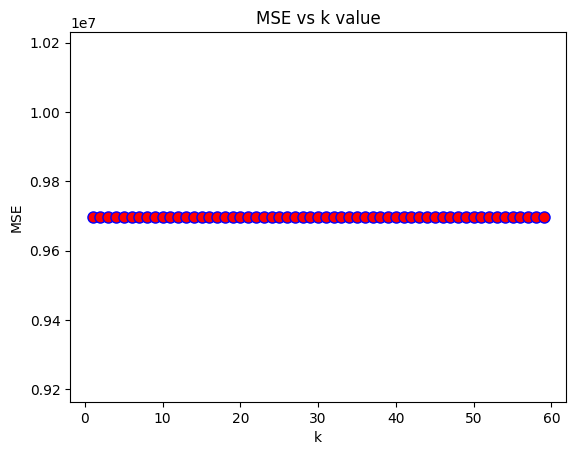

In [45]:
# PLOT FOR ERROR VALUE
plt.plot(range(1,60),knn_mse,color='blue',linestyle='dashed',marker='o',markerfacecolor='red', markersize=8)
plt.title('MSE vs k value')
plt.xlabel('k')
plt.ylabel("MSE")

In [46]:
#DecisionTreeRegressor

In [47]:
# DecisionTreeRegressor

from sklearn.tree import DecisionTreeRegressor

# Create a # Create a Linear Regression model model
dt=DecisionTreeRegressor()

# Train the model on the training data
dt.fit(x_train,y_train)

# Make predictions on the test data
y_pred_dt=dt.predict(x_test)

# Evaluate the model's performance
print('MAE:',mean_absolute_error(y_test,y_pred_dt))
mse_dt=mean_squared_error(y_test,y_pred_dt)
print('MSE:',mse_dt)

MAE: 1700.9166612903225
MSE: 6275232.620449822


Text(0.5, 1.0, 'EVALUATE')

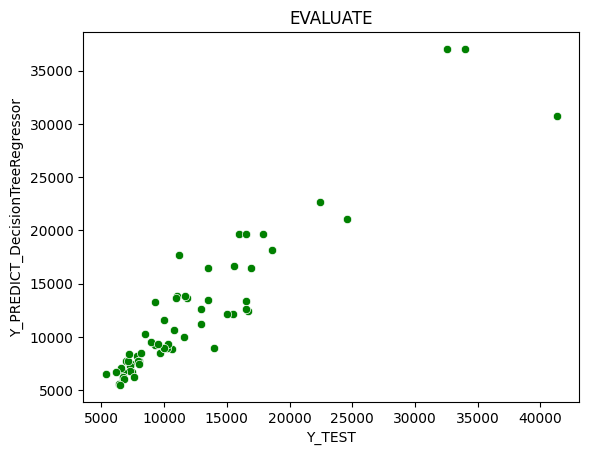

In [48]:
# Create a scatter plot
sns.scatterplot(x=y_test,y=y_pred_dt,color = "green")
# Add labels and a title
plt.xlabel('Y_TEST')
plt.ylabel('Y_PREDICT_DecisionTreeRegressor')
plt.title('EVALUATE')

Text(0, 0.5, 'mse')

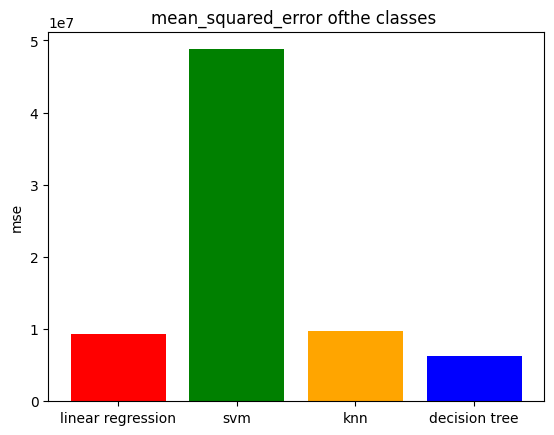

In [52]:
class_name = ('linear regression','svm','knn','decision tree')
class_score=(mse_lr,mse_svm,mse_knn,mse_dt)
colors=('r','g','orange','b','pink')
plt.bar(class_name,class_score,color=colors)
plt.title ("mean_squared_error ofthe classes ")
plt.ylabel('mse')

# r2_score

In [53]:
from sklearn.metrics import r2_score

In [54]:
r2_lr=r2_score(y_test,y_pred_lr)
print('r2_score_lr',r2_lr)
r2_svm=r2_score(y_test,y_pred_svm)
print('r2_score_svm',r2_svm)
r2_knn=r2_score(y_test,y_pred_knn)
print('r2_score_knn',r2_knn)
r2_dt=r2_score(y_test,y_pred_dt)
print('r2_score_knn',r2_dt)

r2_score_lr 0.7995224343756604
r2_score_svm -0.045671896902632625
r2_score_knn 0.7921016351586058
r2_score_knn 0.8654660288346897


In [55]:
#r2 in function

In [56]:
def r2score(Y_test,Y_pred):
  print('R2 SCORE',r2_score(Y_test,Y_pred))

In [57]:
#LR
r2score(y_test,y_pred_lr)
#KNN
r2score(y_test,y_pred_knn)
# SVM
r2score(y_test,y_pred_svm)
# DT
r2score(y_test,y_pred_dt)

R2 SCORE 0.7995224343756604
R2 SCORE 0.7921016351586058
R2 SCORE -0.045671896902632625
R2 SCORE 0.8654660288346897


In [58]:
#data frame

In [59]:
data={"model":['LinearRegression','SVM','KNN','DecisionTreeRegressor'],
      "mse":[mse_lr,mse_svm,mse_knn,mse_dt],
      'r2score':[r2_lr,r2_svm,r2_knn,r2_dt]}
df2=pd.DataFrame(data)
df2.T

,0,1,2,3
model,LinearRegression,SVM,KNN,DecisionTreeRegressor
mse,9351120.379316,48774553.675132,9697257.796604,6275232.62045
r2score,0.799522,-0.045672,0.792102,0.865466
